In [ ]:
import pandas as pd
import requests
import pandas_profiling
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
'''
idea principal: ver si en las zonas donde hay más terremotos hay más o menos densidad de población

el propio dataset nos da la información de la cantidad de terremotos

la densidad de población nos la dará una API
'''

In [16]:
res = requests.get('http://api.worldbank.org/v2/region?format=json')
apidata = res.json()

In [17]:
data = pd.read_csv('earthquake.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
id           24007 non-null float64
date         24007 non-null object
time         24007 non-null object
lat          24007 non-null float64
long         24007 non-null float64
country      24007 non-null object
city         11754 non-null object
area         12977 non-null object
direction    10062 non-null object
dist         10062 non-null float64
depth        24007 non-null float64
xm           24007 non-null float64
md           24007 non-null float64
richter      24007 non-null float64
mw           5003 non-null float64
ms           24007 non-null float64
mb           24007 non-null float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [18]:
data.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [19]:
report = pandas_profiling.ProfileReport(data)
report

Number of variables,17
Number of observations,24007
Total Missing (%),17.2%
Total size in memory,3.1 MiB
Average record size in memory,136.0 B
Numeric,11
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


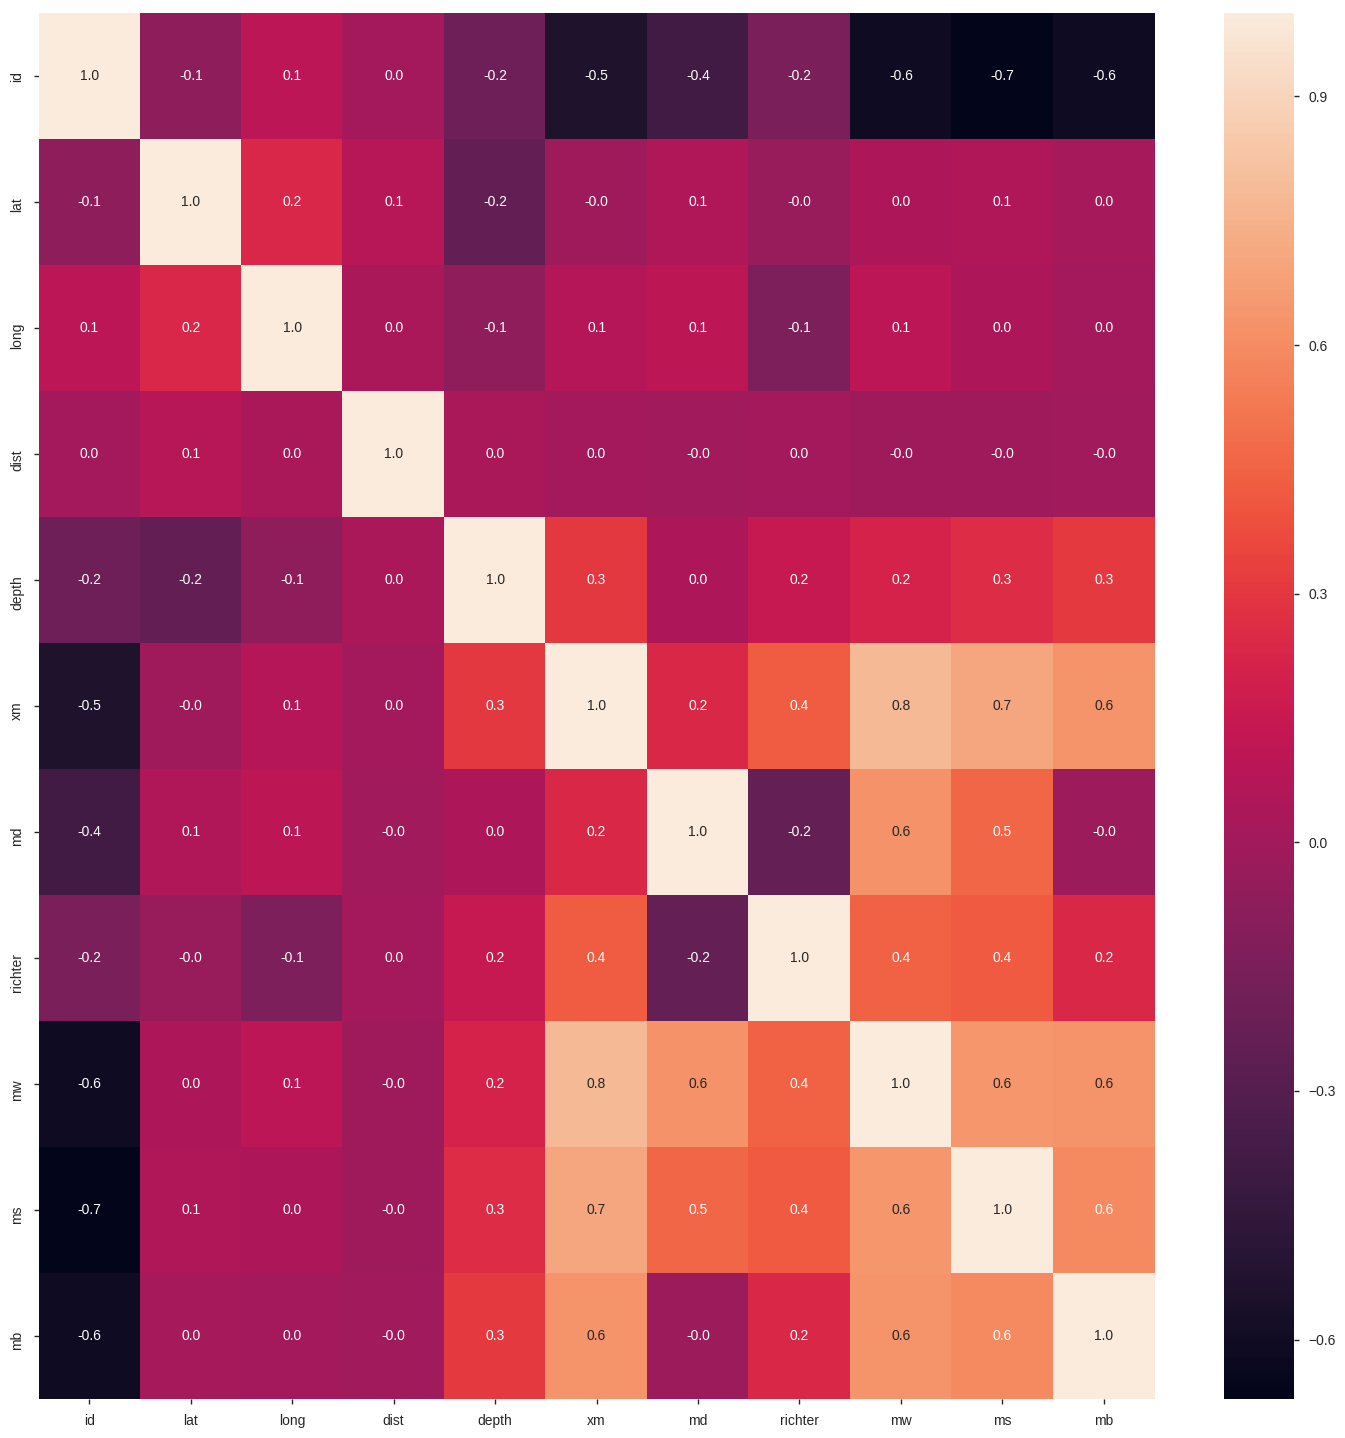

In [27]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, fmt= '.1f')
plt.show()